<a href="https://colab.research.google.com/github/Reysadena/Credit-Risk-Analysis-and-Prediction/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install matplotlib --upgrade

# 1. Import Library and Loading Data

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import scipy.stats as stats
warnings.filterwarnings('ignore')
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

matplotlib: 3.6.3


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
loan = pd.read_csv('/content/drive/MyDrive/BELAJAR/Rakamin Data Science Bootcamp Batch 25/loan_data_2007_2014.csv')

In [5]:
drive.flush_and_unmount()

# 2. Data Understanding

In [6]:
df = loan.copy()
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

There are so much missing values

In [8]:
#grouping data

cats = []
nums = []
for col in df.columns: 
    if df[col].dtype == 'object':
        cats.append(col)
    else:
        nums.append(col)

In [9]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


*   Feature `policy_code` has one unique value, it can be dropped
*   So much numerical features with Nan values, it have to drop



In [10]:
df[cats].describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


*   The datatype of `issue_d`, `earliest_cr_line`, `last_pymnt_d`, and `next_pymnt_d` must be datetime not object
*   There are categorical features with so much unique values and it will be drop (`emp_title`, `url`, `desc`, `title`, `zip_code`, `addr_state`)
*   There is also a categorical feature with one unique value, `application_type` also will be dropped because it doesn't contain any information else





## Check Target

In [11]:
print (df['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [12]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

* `loan_status` as target feature has 9 unique values. For more details check this [note](https://help.lendingclub.com/hc/en-us/articles/216109367-What-Do-the-Different-Note-Statuses-Mean-#:~:text=Current%E2%80%94the%20loan%20is%20up,first%20tranche%20of%20loan%20delinquency.)
* The values divided into two groups there are good and bad loan
* Good loan defined has loan status `Current`, `Fully Paid`, `Does not meet the credit policy. Status:Fully Paid` and `In Grace Period`
* Then bad loan is otherwise with status `Charged Off`, `Late (31-120 days)`, , `Late (16-30 days)`, `Default`, and `Does not meet the credit policy. Status:Charged Off` 





In [13]:
#create target column
df['target'] = np.where((df['loan_status'] =='Charged Off') | 
                        (df['loan_status'] =='Default') | 
                        (df['loan_status'] =='Late (31-120 days)') | 
                        (df['loan_status'] =='Late (16-30 days)') |
                        (df['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),1,0)

In [14]:
dft = df.groupby('target').agg({'id':'count'}).reset_index()
dft['target'] = dft['target'].replace({1:'Bad',
                                       0:'Good'})
dft.columns = ['Status Loan','Total']
dft['Percentage (%)'] = round(dft['Total']*100/sum(dft['Total']),2)
dft  

,Status Loan,Total,Percentage (%)
0,Good,414099,88.81
1,Bad,52186,11.19


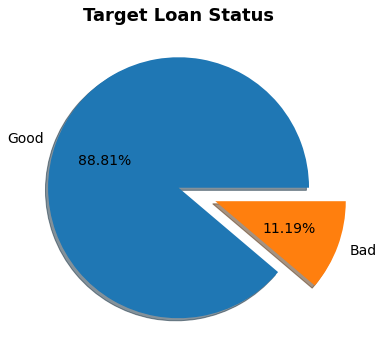

In [15]:
#visualization

plt.figure(figsize=(6,6))
plt.pie(dft['Total'], labels=dft['Status Loan'], autopct='%.2f%%', 
        shadow=True, explode=(0, 0.3), textprops={'fontsize': 14})
plt.title('Target Loan Status', color='black',fontsize=18,fontweight='semibold', pad=1)
plt.show()

About 11.19% of borrowers can't fully pay back the money; we can call it a bad credit rate. We must manage to minimize this rate so it can reduce the loss.

## Drop column

In [16]:
#check dimention before drop
print('The dataset before dropping has %d rows dan %d columns.' % df.shape)

#drop unnescessary columns
df = df.dropna(axis=1, how='all')
df = df.drop(columns=['policy_code','emp_title','url','desc','title','zip_code','addr_state','application_type'], axis=1)

#check dimention after drop
print('The dataset after dropping has %d rows dan %d columns.' % df.shape)

The dataset before dropping has 466285 rows dan 75 columns.
The dataset after dropping has 466285 rows dan 50 columns.


# 3. Exploratory Data Analysis (EDA)

In [17]:
df1 = df.copy()

In [18]:
#grouping data

cats1 = []
nums1 = []
for col in df1.columns: 
    if df1[col].dtype == 'object':
        cats1.append(col)
    else:
        nums1.append(col)

In [19]:
df1.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN,1


In [20]:
for col in cats1:
    print(f'''Value count on column {col}:''')
    print(df1[col].value_counts())
    print()

Value count on column term:
 36 months    337953
 60 months    128332
Name: term, dtype: int64

Value count on column grade:
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Value count on column sub_grade:
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

Value count on column emp_length:
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: i

- The datatype of `issue_d`, `earliest_cr_line`, `last_pymnt_d`, and `next_pymnt_d` must be convert into datetime
- Value `NONE` and `ANY` on `home_ownership` feature combined as `OTHER`

## Univariate Analysis

## Bivariate Analysis

## Multivariate Analysis

## Business Insight

This insight just focus on the bad loans

How much is the amount of total loss suffered by the company ? 

### Total Loss

In [21]:
#calculate the loan must be paid
bd= df1[df1['target']==1]
bd['must_py'] = np.where(bd['term']=='60 months',bd['installment']*60,bd['installment']*36)


#calculate the remaining load must be paid
bd['remain_py'] = bd['must_py']-(bd['total_pymnt']+bd['total_rec_late_fee']+bd['collection_recovery_fee'])
bd.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,must_py,remain_py
450309,11355162,13287320,7200,7200,7200.0,36 months,14.98,249.52,C,C3,8 years,RENT,18000.0,Verified,Jan-14,Charged Off,n,debt_consolidation,32.60,0.0,Mar-97,0.0,NaN,88.0,4.0,1.0,3384,94.0,20.0,w,0.0,0.0,2830.31,2830.31,1334.33,661.83,0.0,834.15,8.3415,Oct-14,249.52,NaN,Nov-15,0.0,NaN,0.0,0.0,4076.0,3600.0,1,8982.72,6144.0685
373723,17695010,19827480,7475,7475,7475.0,36 months,15.61,261.37,D,D1,< 1 year,RENT,41600.0,Verified,Jun-14,Charged Off,n,small_business,24.58,0.0,Aug-96,0.0,NaN,NaN,13.0,0.0,7969,41.7,19.0,f,0.0,0.0,3397.81,3397.81,2308.47,1089.34,0.0,0.00,0.0000,Jul-15,261.37,NaN,Jan-16,0.0,NaN,0.0,0.0,63588.0,19100.0,1,9409.32,6011.5100
117184,6157026,7639151,16500,16500,16500.0,60 months,22.70,462.31,E,E5,10+ years,RENT,70000.0,Source Verified,Jul-13,Charged Off,n,debt_consolidation,21.34,0.0,Jul-00,0.0,NaN,NaN,19.0,0.0,12662,68.8,36.0,f,0.0,0.0,1848.72,1848.72,617.83,1230.89,0.0,0.00,0.0000,Nov-13,462.31,NaN,Jan-16,0.0,NaN,0.0,0.0,29163.0,18400.0,1,16643.16,14794.4400


Based on this [sheet](https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit?usp=sharing&ouid=108662929689475296617&rtpof=true&sd=true)

*  `installment` : The monthly payment owed by the borrower if the loan originates
* `term` : The number of payments on the loan. Values are in months and can be either 36 or 60.
* `total_pymnt` : Payments received to date for total amount funded
* `total_rec_late_fee` : Late fees received to date
* `collection_recovery_fee` : Post charge off collection fee

The new feature:
* `must_py` : The total payment loan must be paid
* ` remain_py` : The remaining bill is to be paid from the total payment loan reducing the fees








In [22]:
# total applicants and loss
print('The number of applicants who have a risky or bad loan is', bd['id'].count())
print('Total loss suffered by the company is', bd['remain_py'].sum())

The number of applicants who have a risky or bad loan is 52186
Total loss suffered by the company is 460592124.9086067


About 11.19% of borrowers can't fully pay back, and it potentially causes the company's loss of about $460.592.124,9086067

### Total loss for each loan status

In [23]:
bd1 = bd.copy()
bd1['loan_status'].unique()

array(['Charged Off', 'Default', 'Late (31-120 days)',
       'Late (16-30 days)',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [25]:
#grouping loan_status
def group(a):
  if a['loan_status'] == 'Charged Off' :
    group = 'Charged Off'
  elif a['loan_status'] == 'Does not meet the credit policy. Status:Charged Off' :
    group = 'Charged Off'
  elif a['loan_status'] == 'Default' :
    group = 'Default'
  else:
    group = 'Late'
  return group

bd1['loan_status']=bd1.apply(lambda a:group (a), axis=1)

In [81]:
a = bd1.groupby(['loan_status']).agg({'remain_py':'sum',
                                      'id':'count'}).reset_index()
a['%'] = round(a['remain_py']*100/sum(a['remain_py']),2)
a.columns = ['Status Loan','Total Loss', 'Total Applicant','Percentage (%)']
a = a.sort_values(by = ['Total Loss'], ascending=False)
a

,Status Loan,Total Loss,Total Applicant,Percentage (%)
0,Charged Off,3.904369e+08,43236,84.77
2,Late,6.298769e+07,8118,13.68
1,Default,7.167521e+06,832,1.56


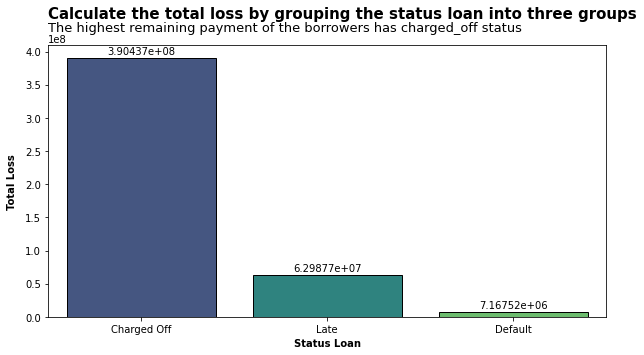

In [143]:
#visualization

fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x= a['Status Loan'], y= a['Total Loss'], 
                edgecolor= 'black', palette='viridis', )
plt.xlabel('Status Loan', weight = 'semibold', size=10)
plt.ylabel('Total Loss', labelpad=8, weight='semibold', size=10)
plt.text(x=-0.5,y=450000000, s='Calculate the total loss by grouping the status loan into three groups', color='black',fontsize=15, weight='semibold')
plt.text(x=-0.5,y=430000000, s='The highest remaining payment of the borrowers has charged_off status', color='black',fontsize=13)
plt.bar_label(ax.containers[0], padding=2)
plt.show()

### Top Purpose

What purpose is the most used by the borrower for credit with bad category status?

In [110]:
x = bd1.groupby(['purpose']).agg({'id':'count'}).reset_index()
x['%'] = round(x['id']*100/sum(x['id']),2)
x.columns = ['Purpose','Total','Percentage (%)']
x = x.sort_values(by = ['Total'], ascending=False)
x

,Purpose,Total,Percentage (%)
2,debt_consolidation,31836,61.00
1,credit_card,9200,17.63
9,other,3339,6.40
4,home_improvement,2672,5.12
11,small_business,1546,2.96
6,major_purchase,962,1.84
7,medical,624,1.20
0,car,488,0.94
8,moving,465,0.89
5,house,322,0.62


In [83]:
b = bd1.groupby(['purpose']).agg({'remain_py':'sum',
                                    'id':'count'}).reset_index()
b['%'] = round(b['remain_py']*100/sum(b['remain_py']),2)
b.columns = ['Purpose','Total Loss', 'Total Applicant','Percentage (%)']
b = b.sort_values(by = ['Total Loss'], ascending=False)
b

,Purpose,Total Loss,Total Applicant,Percentage (%)
2,debt_consolidation,2.933504e+08,31836,63.69
1,credit_card,8.222382e+07,9200,17.85
4,home_improvement,2.415054e+07,2672,5.24
9,other,2.172214e+07,3339,4.72
11,small_business,1.576473e+07,1546,3.42
6,major_purchase,7.297800e+06,962,1.58
7,medical,3.961043e+06,624,0.86
5,house,2.751568e+06,322,0.60
8,moving,2.746097e+06,465,0.60
0,car,2.520939e+06,488,0.55


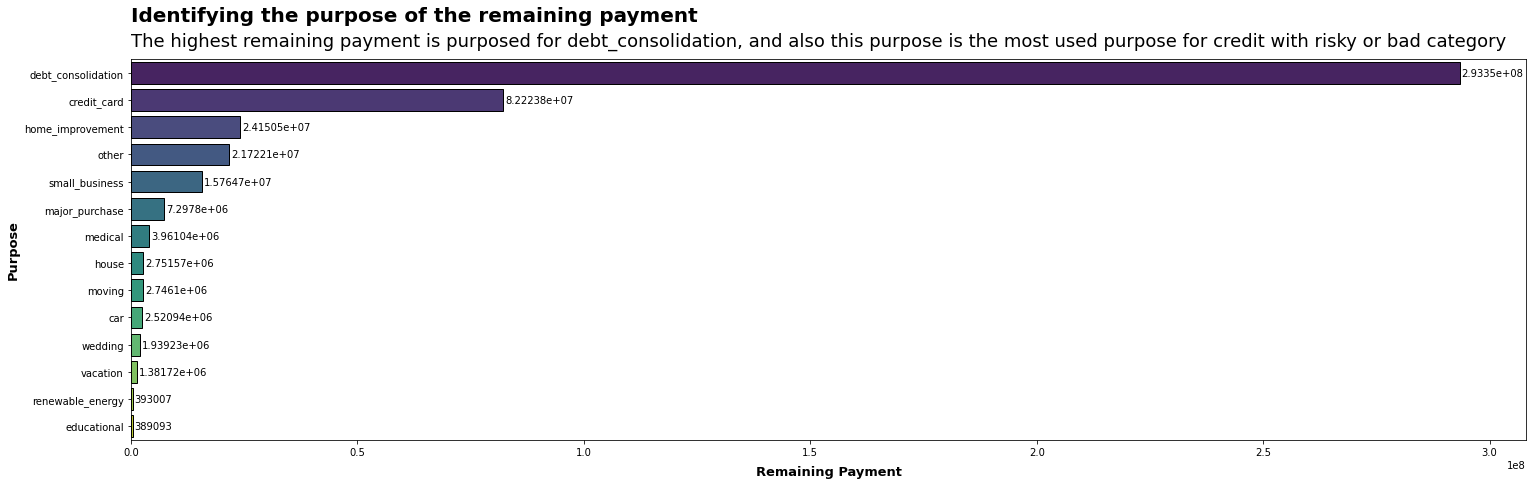

In [144]:
#visualization

fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(y= b['Purpose'], x= b['Total Loss'], 
                edgecolor= 'black', palette='viridis', )
plt.ylabel('Purpose', weight = 'semibold', size=13)
plt.xlabel('Remaining Payment', labelpad=8, weight='semibold', size=13)
plt.text(x=1,y=-1.9, s='Identifying the purpose of the remaining payment ', color='black',fontsize=20, weight='semibold')
plt.text(x=1,y=-1, s='The highest remaining payment is purposed for debt_consolidation, and also this purpose is the most used purpose for credit with risky or bad category', color='black',fontsize=18)
plt.bar_label(ax.containers[0], padding=2)
plt.show()